In [30]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score, StratifiedKFold,GridSearchCV,RandomizedSearchCV
from sklearn.feature_selection import mutual_info_classif,SelectKBest,chi2,RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,ConfusionMatrixDisplay
from scipy.stats import uniform, randint
from sklearn import tree
import plotly.express as px


In [31]:
import warnings
warnings.filterwarnings("ignore")

In [32]:
demos = pd.read_csv(r'data\demos.csv')
dispositions = pd.read_csv(r'data\dispositions.csv')
email_sends = pd.read_csv(r'data\email_sends.csv')

In [33]:
email_sends.head(5)

id  timets  opened  clicked
0   1       5       0        0
1   4      39       0        0
2   5      38       0        0
3   6      20       0        0
4   6      20       0        0

In [34]:
dispositions.rename(columns = {'timets':'days_since_handraise'}, inplace = True)

In [35]:
merged_df = demos.merge(dispositions, how='inner', on='id')

In [36]:
merged_df.head()

gender    education     income residence_type              children  \
0    Male    Bachelors  70K - 80K      Townhouse  Two or more Children   
1  Female  High School     < 20 k      Apartment  Two or more Children   
2    Male    Bachelors     < 20 k      Apartment  Two or more Children   
3    Male    Bachelors  70K - 80K      Apartment  Two or more Children   
4    Male          PhD     < 20 k      Townhouse           No Children   

  marital_status    numb_of_vehicles      age       voi_type job_industry  \
0        Married  2 or more vehicles     <=18         sports  scienctific   
1         Single  2 or more vehicles  19 - 24       mini-van     industry   
2         Single  2 or more vehicles  19 - 24  crossover suv  scienctific   
3         Single  2 or more vehicles  19 - 24       mini-van  scienctific   
4         Single           1 Vehicle  19 - 24  crossover suv  scienctific   

                fear_of_tech years_in_workforce  \
0  uses technology regularly              4 - 5   
1  uses technology regularly              1 - 2   
2           loves technology              4 - 5   
3           loves technology              1 - 2   
4  uses technology regularly              4 - 5   

                            driver_type type_of_spender  \
0  daily vehicle (short/long distances)  Medium Spender   
1                  short distnaces only  Medium Spender   
2                  short distnaces only  Medium Spender   
3     occassional long distrance driver     Big Spender   
4     occassional long distrance driver  Cost Conscious   

                brand_interest  id  days_since_handraise  y  
0  purhcased from brand before   1                     5  1  
1               love the brand   2                     2  0  
2               love the brand   3                     7  1  
3  purhcased from brand before   4                    39  1  
4           heard of the brand   5                    17  0

In [37]:
received_email_engg = email_sends['id'].unique()
opened_email_engg = email_sends[email_sends['opened'] == 1]['id'].unique()

In [38]:
merged_df['received_email_engagement'] = merged_df['id'].apply(lambda x: 1 if x in received_email_engg else 0)

merged_df['opened_email_engagement'] = merged_df['id'].apply(lambda x: 1 if x in opened_email_engg else 0)

In [39]:
merged_df.head(5)

gender    education     income residence_type              children  \
0    Male    Bachelors  70K - 80K      Townhouse  Two or more Children   
1  Female  High School     < 20 k      Apartment  Two or more Children   
2    Male    Bachelors     < 20 k      Apartment  Two or more Children   
3    Male    Bachelors  70K - 80K      Apartment  Two or more Children   
4    Male          PhD     < 20 k      Townhouse           No Children   

  marital_status    numb_of_vehicles      age       voi_type job_industry  \
0        Married  2 or more vehicles     <=18         sports  scienctific   
1         Single  2 or more vehicles  19 - 24       mini-van     industry   
2         Single  2 or more vehicles  19 - 24  crossover suv  scienctific   
3         Single  2 or more vehicles  19 - 24       mini-van  scienctific   
4         Single           1 Vehicle  19 - 24  crossover suv  scienctific   

                fear_of_tech years_in_workforce  \
0  uses technology regularly              4 - 5   
1  uses technology regularly              1 - 2   
2           loves technology              4 - 5   
3           loves technology              1 - 2   
4  uses technology regularly              4 - 5   

                            driver_type type_of_spender  \
0  daily vehicle (short/long distances)  Medium Spender   
1                  short distnaces only  Medium Spender   
2                  short distnaces only  Medium Spender   
3     occassional long distrance driver     Big Spender   
4     occassional long distrance driver  Cost Conscious   

                brand_interest  id  days_since_handraise  y  \
0  purhcased from brand before   1                     5  1   
1               love the brand   2                     2  0   
2               love the brand   3                     7  1   
3  purhcased from brand before   4                    39  1   
4           heard of the brand   5                    17  0   

   received_email_engagement  opened_email_engagement  
0                          1                        0  
1                          0                        0  
2                          0                        0  
3                          1                        0  
4                          1                        0

In [40]:
# categorical_features = ['gender','marital_status','residence_type','children','age','numb_of_vehicles','income','voi_type']

# fig, axes = plt.subplots(4, 2, figsize=(25, 15))

# for i, feature in enumerate(categorical_features):
#     ax = sns.countplot(x='education', hue=feature, data=merged_df, ax=axes[i // 2, i % 2])
#     ax.set_title(f'Plot {i+1}: Countplot for {feature}')
#     ax.set_xlabel(feature)
#     ax.set_ylabel('Count')

# plt.tight_layout(rect=[0, 0.03, 1, 0.95])
# plt.show()

In [41]:
# categorical_features = ['job_industry','fear_of_tech','years_in_workforce','driver_type','type_of_spender','brand_interest']

# fig, axes = plt.subplots(3, 2, figsize=(25, 15))

# for i, feature in enumerate(categorical_features):
#     ax = sns.countplot(x='education', hue=feature, data=merged_df, ax=axes[i // 2, i % 2])
#     ax.set_title(f'Plot {i+1}: Countplot for {feature}')
#     ax.set_xlabel(feature)
#     ax.set_ylabel('Count')

# plt.tight_layout(rect=[0, 0.03, 1, 0.95])
# plt.show()

In [42]:
df = merged_df.copy()

In [43]:
#impute missing value 
df['gender'] = df.groupby('voi_type')['gender'].transform(lambda x: x.fillna(x.mode().iloc[0]))

In [44]:
# Get all categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Apply SimpleImputer to fill missing values in categorical columns
imputer = SimpleImputer(strategy='most_frequent')
df[categorical_columns] = imputer.fit_transform(df[categorical_columns])

In [45]:
df.isnull().sum()

gender                       0
education                    0
income                       0
residence_type               0
children                     0
marital_status               0
numb_of_vehicles             0
age                          0
voi_type                     0
job_industry                 0
fear_of_tech                 0
years_in_workforce           0
driver_type                  0
type_of_spender              0
brand_interest               0
id                           0
days_since_handraise         0
y                            0
received_email_engagement    0
opened_email_engagement      0
dtype: int64

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 20 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   gender                     500000 non-null  object
 1   education                  500000 non-null  object
 2   income                     500000 non-null  object
 3   residence_type             500000 non-null  object
 4   children                   500000 non-null  object
 5   marital_status             500000 non-null  object
 6   numb_of_vehicles           500000 non-null  object
 7   age                        500000 non-null  object
 8   voi_type                   500000 non-null  object
 9   job_industry               500000 non-null  object
 10  fear_of_tech               500000 non-null  object
 11  years_in_workforce         500000 non-null  object
 12  driver_type                500000 non-null  object
 13  type_of_spender            500000 non-null  

In [47]:
#dropping 'id' column as it is not relevant for modeling
df = df.drop(columns=['id'])

In [48]:
fig = px.box(df, y='days_since_handraise', title=f'Box Plot for {'days_since_handraise'}')
fig.update_layout(
    paper_bgcolor='LightSteelBlue',
    height=500, width=600
    )
# Show the plot
fig.show()

In [49]:
columns_for_one_hot_encoding = ['residence_type', 'marital_status', 'voi_type', 'job_industry', 'fear_of_tech', 'driver_type', 'type_of_spender']
columns_for_Label_encoding = ['gender','education','income','age','years_in_workforce','children','numb_of_vehicles','brand_interest']

# custom mapping
gender_mapping = {'Female': 0,'Male': 1 }
edu_mapping = {'less than HS': 0, 'High School': 1, 'Junior College': 2, 'Bachelors': 3, "Master's": 4, 'PhD': 5}
sal_mapping = {'< 20 k': 0, '30K - 40K': 1, '40K - 50K': 2, '50K - 60K': 3, "70K - 80K": 4, '80K - 90K': 5, '>100K': 6}
age_mapping = {'<=18': 0, '19 - 24': 1, '25-30': 2, '30-40': 3, "40-50": 4, '60+': 5}
yrs_mapping = {'0 - 1': 0, '1 - 2': 1, '2 - 3': 2, '3 - 4': 3, "4 - 5": 4, '5+': 5}
children_mapping = {'No Children':0, '1 Child':1 ,'Two or more Children': 2}
no_veh_maping = {'No vehicles' :0,'1 Vehicle':1,'2 or more vehicles':2}
brand_int_maping = {'heard of the brand': 0, 'purhcased from brand before': 1,'love the brand': 2}



# mapping columns to encoding 

col_enco = {'gender' : gender_mapping, 'education' : edu_mapping,'income' : sal_mapping,'age' : age_mapping,'years_in_workforce' : yrs_mapping, 'children':children_mapping, 'numb_of_vehicles' : no_veh_maping, 'brand_interest':brand_int_maping }


for col, map in col_enco.items():
    encoder = OrdinalEncoder(categories=[sorted(map, key=map.get)])
    df[col] = encoder.fit_transform(df[[col]])


In [50]:
for col in columns_for_one_hot_encoding :
    print(col, ':', len(df[col].unique()))

residence_type : 4
marital_status : 3
voi_type : 6
job_industry : 7
fear_of_tech : 4
driver_type : 4
type_of_spender : 3


In [51]:
def one_hot_encode_dataframe(df, columns_for_one_hot_encoding):
    df_copy = df.copy()

    # Extract columns to encode from the DataFrame
    categorical_data = df_copy[columns_for_one_hot_encoding]

    encoder = OneHotEncoder()
    
    encoded_data = encoder.fit_transform(categorical_data).toarray()
    df_encoded = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(columns_for_one_hot_encoding))
    df_copy = pd.concat([df_copy, df_encoded], axis=1)

    # Drop the original categorical columns
    df_copy = df_copy.drop(columns=columns_for_one_hot_encoding)

    return df_copy



In [52]:
df = one_hot_encode_dataframe(df,columns_for_one_hot_encoding)

In [53]:
X = df.drop('y',axis=1)
y = df['y']

In [54]:
X.head()

gender  education  income  children  numb_of_vehicles  age  \
0     1.0        3.0     4.0       2.0               2.0  0.0   
1     0.0        1.0     0.0       2.0               2.0  1.0   
2     1.0        3.0     0.0       2.0               2.0  1.0   
3     1.0        3.0     4.0       2.0               2.0  1.0   
4     1.0        5.0     0.0       0.0               1.0  1.0   

   years_in_workforce  brand_interest  days_since_handraise  \
0                 4.0             1.0                     5   
1                 1.0             2.0                     2   
2                 4.0             2.0                     7   
3                 1.0             1.0                    39   
4                 4.0             0.0                    17   

   received_email_engagement  ...  fear_of_tech_hates technology  \
0                          1  ...                            0.0   
1                          0  ...                            0.0   
2                          0  ...                            0.0   
3                          1  ...                            0.0   
4                          1  ...                            0.0   

   fear_of_tech_loves technology  fear_of_tech_uses technology regularly  \
0                            0.0                                     1.0   
1                            0.0                                     1.0   
2                            1.0                                     0.0   
3                            1.0                                     0.0   
4                            0.0                                     1.0   

   driver_type_daily vehicle (short/long distances)  \
0                                               1.0   
1                                               0.0   
2                                               0.0   
3                                               0.0   
4                                               0.0   

   driver_type_long distrance driver  \
0                                0.0   
1                                0.0   
2                                0.0   
3                                0.0   
4                                0.0   

   driver_type_occassional long distrance driver  \
0                                            0.0   
1                                            0.0   
2                                            0.0   
3                                            1.0   
4                                            1.0   

   driver_type_short distnaces only  type_of_spender_Big Spender  \
0                               0.0                          0.0   
1                               1.0                          0.0   
2                               1.0                          0.0   
3                               0.0                          1.0   
4                               0.0                          0.0   

   type_of_spender_Cost Conscious  type_of_spender_Medium Spender  
0                             0.0                             1.0  
1                             0.0                             1.0  
2                             0.0                             1.0  
3                             0.0                             0.0  
4                             1.0                             0.0  

[5 rows x 42 columns]

In [55]:
print(X.dtypes)

gender                                              float64
education                                           float64
income                                              float64
children                                            float64
numb_of_vehicles                                    float64
age                                                 float64
years_in_workforce                                  float64
brand_interest                                      float64
days_since_handraise                                  int64
received_email_engagement                             int64
opened_email_engagement                               int64
residence_type_Apartment                            float64
residence_type_Condo                                float64
residence_type_House                                float64
residence_type_Townhouse                            float64
marital_status_Its Complicated                      float64
marital_status_Married                  

In [56]:
y.head()

0    1
1    0
2    1
3    1
4    0
Name: y, dtype: int64

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

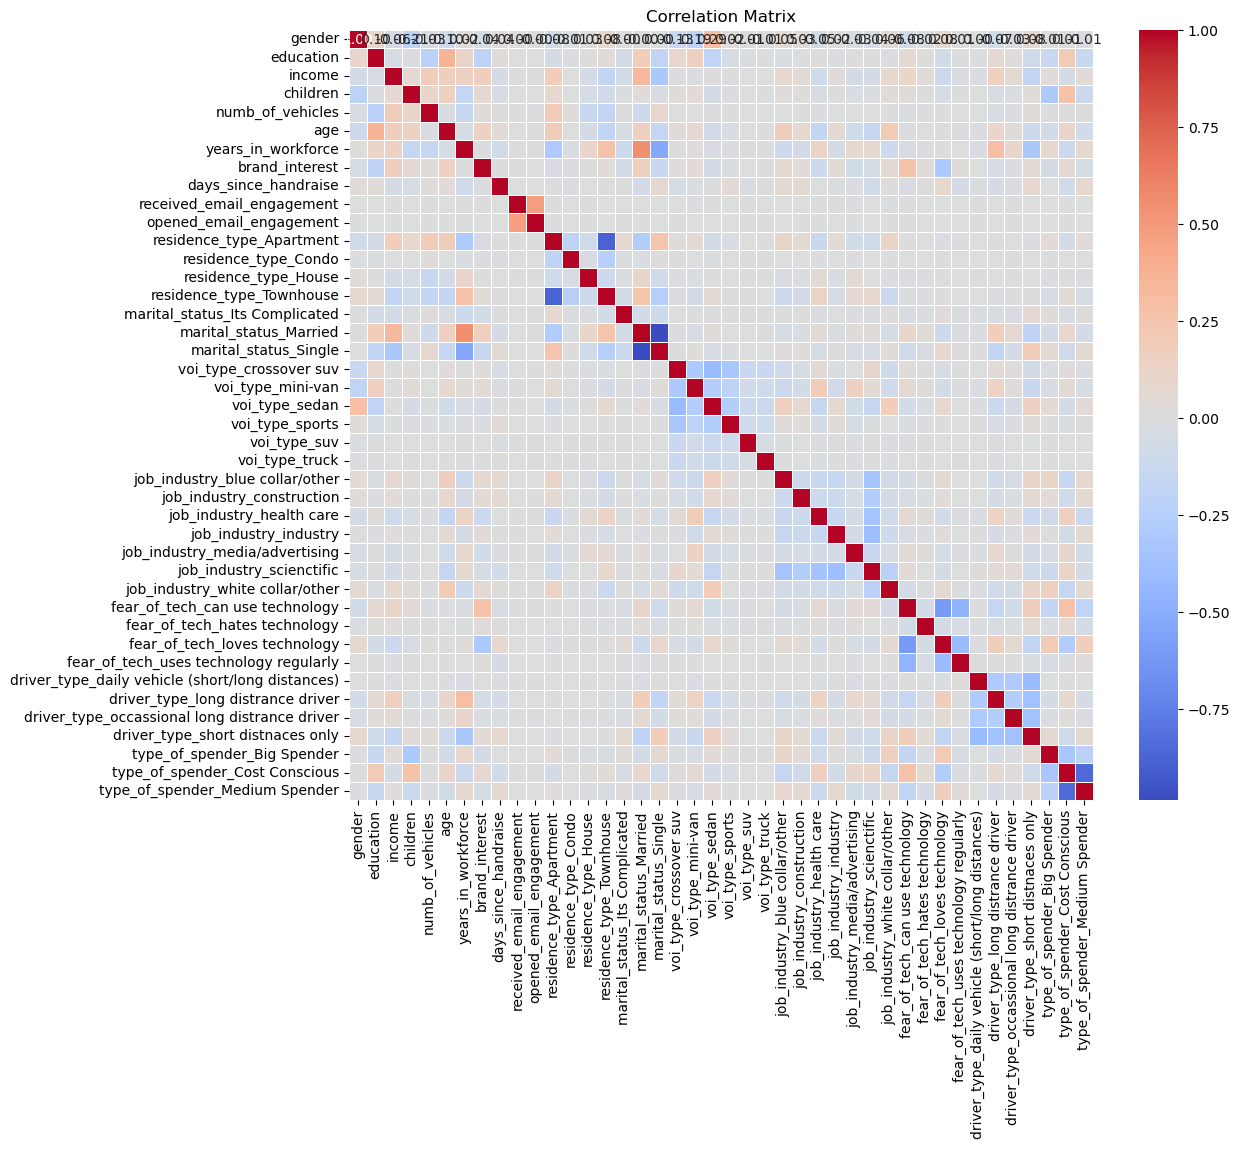

In [58]:
corr_df = X_train.copy()

# Calculate correlation matrix
correlation_matrix = corr_df.corr()

# Plot heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [59]:
# find and remove correlated features
def correlation(corr_matrix, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [60]:
threshold = 0.8
correlation(correlation_matrix,threshold)
# no Corelated features 

set()

Index(['income', 'years_in_workforce', 'days_since_handraise',
       'marital_status_Married', 'voi_type_crossover suv', 'voi_type_sports',
       'job_industry_health care', 'fear_of_tech_loves technology',
       'driver_type_long distrance driver',
       'driver_type_short distnaces only'],
      dtype='object')


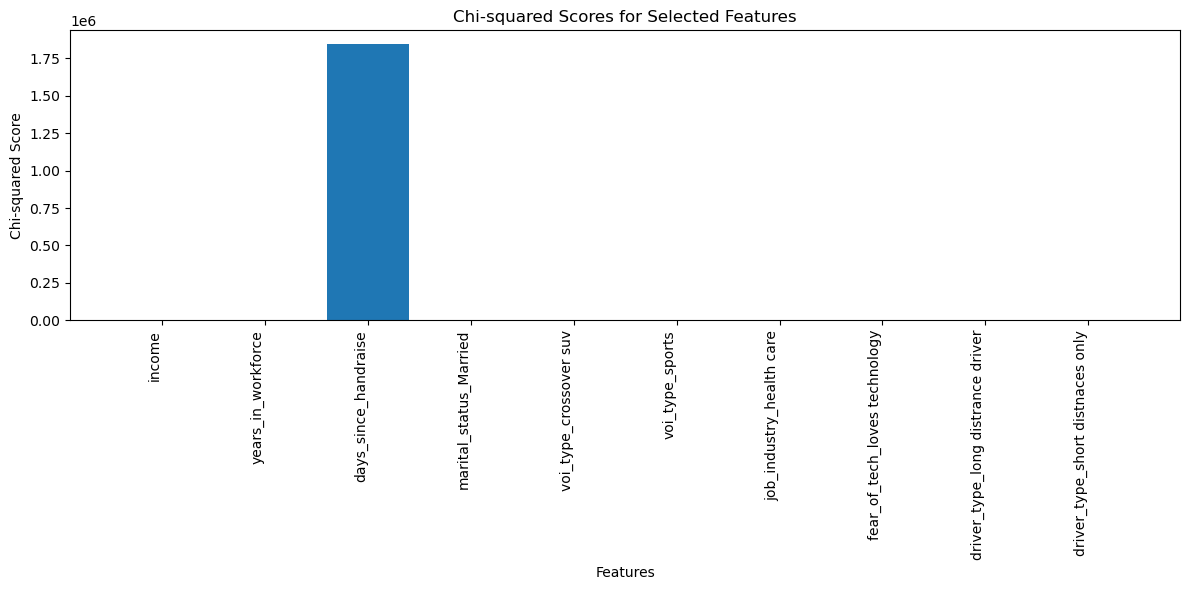

In [61]:
# Using SelectKBest with chi2 for feature selection
k_best = 10  
selector = SelectKBest(chi2, k=k_best)
selector.fit(X_train, y_train)

# selected features
selected_features = X_train.columns[selector.get_support()]

print(selected_features)

# scores for selected features
selected_scores = selector.scores_[selector.get_support()]

# Plot chi2 scores for each selected feature 
plt.figure(figsize=(12, 6))
plt.bar(range(len(selected_scores)), selected_scores, tick_label=selected_features, align='center')
plt.title('Chi-squared Scores for Selected Features')
plt.xlabel('Features')
plt.ylabel('Chi-squared Score')
plt.xticks(rotation=90, ha='right') 
plt.tight_layout()  
plt.show()


In [62]:
k_best = 10  
mutual_info_selector = SelectKBest(mutual_info_classif, k=k_best)
mutual_info_selector.fit(X_train, y_train)

# Get selected features
mutual_info_selected_features = X_train.columns[mutual_info_selector.get_support()]

print(mutual_info_selected_features)

Index(['children', 'numb_of_vehicles', 'brand_interest',
       'days_since_handraise', 'received_email_engagement',
       'residence_type_Townhouse', 'marital_status_Single',
       'job_industry_scienctific', 'fear_of_tech_can use technology',
       'type_of_spender_Cost Conscious'],
      dtype='object')


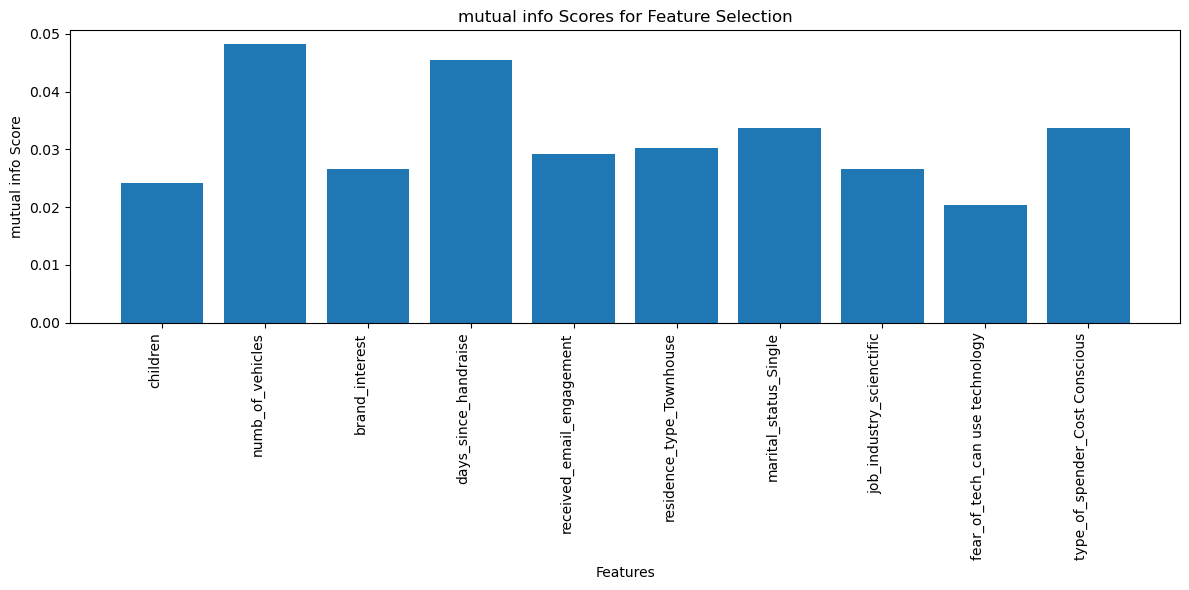

In [63]:
# Ploting mutual_info_classif scores for each feature
plt.figure(figsize=(12, 6))
scores = mutual_info_selector.scores_[mutual_info_selector.get_support()]
plt.bar(range(len(scores)), scores, tick_label=mutual_info_selected_features)
plt.title('mutual info Scores for Feature Selection')
plt.xlabel('Features')
plt.ylabel('mutual info Score')
plt.xticks(rotation=90, ha='right') 
plt.tight_layout()  
plt.show()
plt.show()

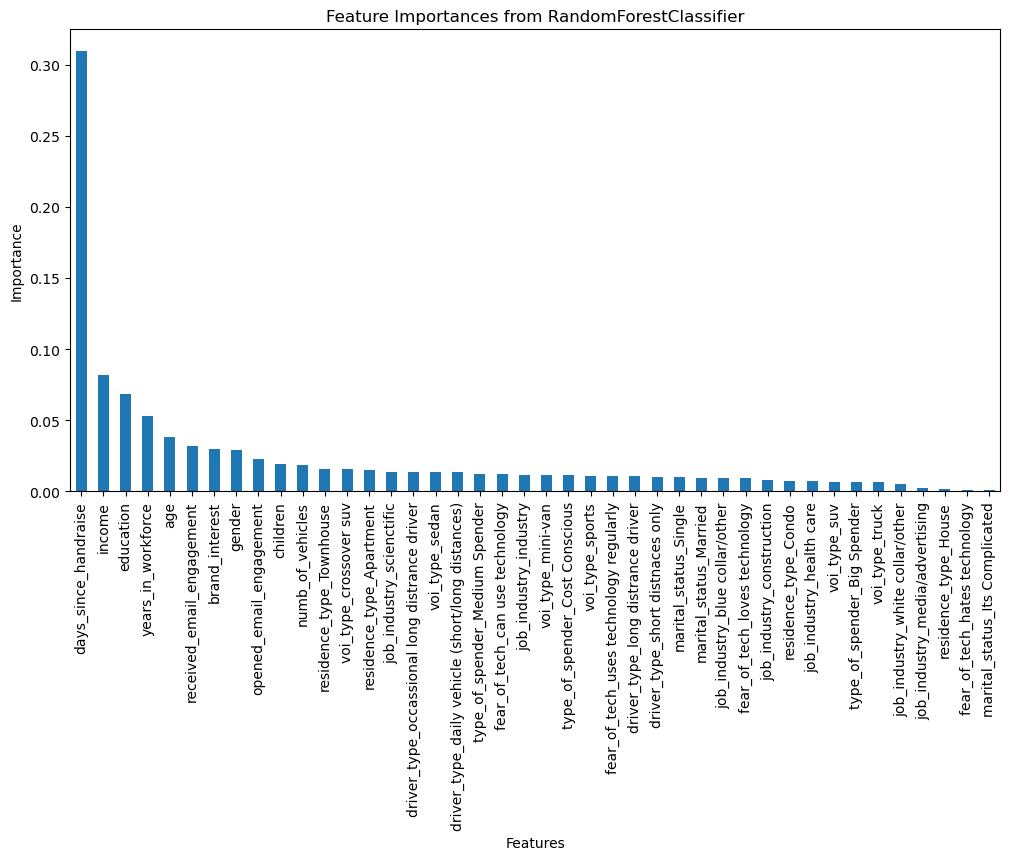

In [64]:
rfc_model = RandomForestClassifier()
rfc_model.fit(X_train, y_train)

# Get feature importances
rfc_feature_importances = pd.Series(rfc_model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 6))
rfc_feature_importances.plot(kind='bar')
plt.title('Feature Importances from RandomForestClassifier')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

In [65]:
rfc_selected_features = rfc_feature_importances.head(10)
rfc_selected_features.index

Index(['days_since_handraise', 'income', 'education', 'years_in_workforce',
       'age', 'received_email_engagement', 'brand_interest', 'gender',
       'opened_email_engagement', 'children'],
      dtype='object')

In [66]:
# feature_names = X_train.columns

# rf_classifier = RandomForestClassifier(random_state=42)
# num_features_to_select = 10  # Set the number of features to select
# rfe_selector = RFE(estimator=rf_classifier, n_features_to_select=num_features_to_select)
# # Get the selected feature names
# selected_feature_names = feature_names[rfe_selector.support_]

# # Print or use the selected feature names
# print("Selected Feature Names:", selected_feature_names)

# # Get the ranking of features
# feature_ranking = rfe_selector.ranking_

# # Print or use the selected feature names and their ranking
# for feature, rank in zip(rfe_selected_features, feature_ranking):
#     print(f"Feature: {feature}, Rank: {rank}")

In [67]:
rfe_selected_features = ['education', 'income', 'age', 'years_in_workforce', 'brand_interest','days_since_handraise', 'received_email_engagement','residence_type_Townhouse', 'voi_type_sedan','driver_type_occassional long distrance driver']

In [68]:
# creating dictonary of fetures
featues_dict = dict.fromkeys(X_train.columns, 0)

In [69]:
def feature_count(data_dict, columns_array):
    for column in columns_array:
        if column in data_dict:
            data_dict[column] += 1
    
    return data_dict

In [70]:
featues_dict = feature_count(featues_dict,selected_features)
featues_dict = feature_count(featues_dict,mutual_info_selected_features)
featues_dict = feature_count(featues_dict,rfc_selected_features.index)
featues_dict = feature_count(featues_dict,rfe_selected_features)


In [71]:
print(featues_dict)

{'gender': 1, 'education': 2, 'income': 3, 'children': 2, 'numb_of_vehicles': 1, 'age': 2, 'years_in_workforce': 3, 'brand_interest': 3, 'days_since_handraise': 4, 'received_email_engagement': 3, 'opened_email_engagement': 1, 'residence_type_Apartment': 0, 'residence_type_Condo': 0, 'residence_type_House': 0, 'residence_type_Townhouse': 2, 'marital_status_Its Complicated': 0, 'marital_status_Married': 1, 'marital_status_Single': 1, 'voi_type_crossover suv': 1, 'voi_type_mini-van': 0, 'voi_type_sedan': 1, 'voi_type_sports': 1, 'voi_type_suv': 0, 'voi_type_truck': 0, 'job_industry_blue collar/other': 0, 'job_industry_construction': 0, 'job_industry_health care': 1, 'job_industry_industry': 0, 'job_industry_media/advertising': 0, 'job_industry_scienctific': 1, 'job_industry_white collar/other': 0, 'fear_of_tech_can use technology': 1, 'fear_of_tech_hates technology': 0, 'fear_of_tech_loves technology': 1, 'fear_of_tech_uses technology regularly': 0, 'driver_type_daily vehicle (short/long 

In [72]:
final_featues = [key for key, value in featues_dict.items() if value >=3]

print(len(final_featues))

5


In [73]:
final_featues 

['income',
 'years_in_workforce',
 'brand_interest',
 'days_since_handraise',
 'received_email_engagement']

In [74]:
X_train = X_train[final_featues]
X_test = X_test[final_featues]

In [75]:
# # Model Selection scaling
# scaler = StandardScaler()

# # Fit the scaler on the training data and transform both training and testing data
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

In [76]:
# Create instances of the models
logistic_regression_model = LogisticRegression(random_state=42)
decision_tree_model = DecisionTreeClassifier(random_state=42)
random_forest_model = RandomForestClassifier(random_state=42)

# Create StratifiedKFold object
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Perform k-fold cross-validation for Logistic Regression
logistic_regression_scores = cross_val_score(logistic_regression_model, X_train, y_train, cv=kfold, scoring='accuracy')
print(f"Logistic Regression Accuracy: {logistic_regression_scores.mean()}")

# Perform k-fold cross-validation for Decision Tree
decision_tree_scores = cross_val_score(decision_tree_model, X_train, y_train, cv=kfold, scoring='accuracy')
print(f"Decision Tree Accuracy: {decision_tree_scores.mean()}")

# Perform k-fold cross-validation for Random Forest
random_forest_scores = cross_val_score(random_forest_model, X_train, y_train, cv=kfold, scoring='accuracy')
print(f"Random Forest Accuracy: {random_forest_scores.mean()}")

Logistic Regression Accuracy: 0.6090171428571428
Decision Tree Accuracy: 0.5872571428571429
Random Forest Accuracy: 0.5943228571428573


In [77]:
# models = [
#     ('Logistic Regression', LogisticRegression(random_state=42), {'C': uniform(0.001, 100)}),
#     ('Decision Tree', DecisionTreeClassifier(random_state=42), {'max_depth': [None, 25, 50, 75], 'min_samples_split': randint(2, 11),'min_samples_leaf': randint(1,4)}),
#     ('Random Forest', RandomForestClassifier(random_state=42), {'n_estimators': randint(100, 2000), 'max_depth': [None, 25, 50, 75], 'min_samples_split': randint(8, 11),'min_samples_leaf': [1, 2, 4]})
# ]

# # Create StratifiedKFold object for cross-validation on training set
# kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# for model_name, model, param_dist in models:
#     print(f"\n{model_name}:")
    
#     # Hyperparameter tuning with RandomizedSearchCV
#     random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=10, cv=kfold, scoring='accuracy',n_jobs=-1, random_state=42)
#     random_search.fit(X_train, y_train)
    
#     best_model = random_search.best_estimator_
#     best_score = random_search.best_score_
    
#     print(f"Best Parameters: {random_search.best_params_}")
#     print(f"Best Cross-Validation Accuracy: {best_score}")

#     # Make predictions on the test set
#     y_pred = best_model.predict(X_test)

#     # Evaluate the model on the test set
#     test_accuracy = accuracy_score(y_test, y_pred)
#     print(f"Test Set Accuracy: {test_accuracy}")

#     # Print classification report for detailed evaluation
#     print("Classification Report:\n", classification_report(y_test, y_pred))

In [78]:
final_random_forest_model = RandomForestClassifier(n_estimators=87, max_depth=11, min_samples_split=9,min_samples_leaf=4 ,random_state=42)

# Train the model on the entire training set
final_random_forest_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = final_random_forest_model.predict(X_test)

# Evaluate the model on the test set
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Set Accuracy: {test_accuracy}")

# Print classification report for detailed evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))

Test Set Accuracy: 0.62336
Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.60      0.60     69736
           1       0.65      0.64      0.65     80264

    accuracy                           0.62    150000
   macro avg       0.62      0.62      0.62    150000
weighted avg       0.62      0.62      0.62    150000



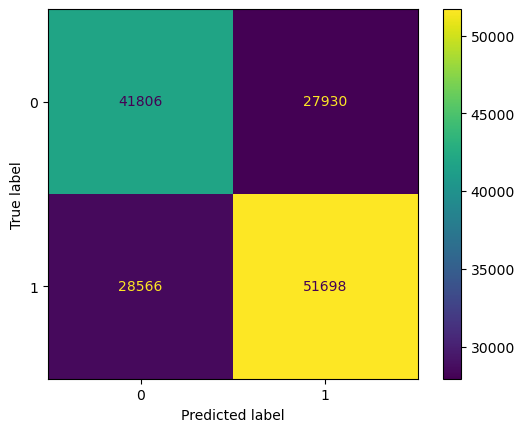

In [79]:
# Calculate the confusion matrix
conf_matrix_rfc = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(conf_matrix_rfc).plot()

In [80]:
final_dt_model = DecisionTreeClassifier(max_depth=10, min_samples_split=9, min_samples_leaf=1,random_state=42)

# Train the model on the entire training set
final_dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = final_dt_model.predict(X_test)

# Evaluate the model on the test set
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Set Accuracy: {test_accuracy}")

# Print classification report for detailed evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))

Test Set Accuracy: 0.6225133333333334
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.58      0.59     69736
           1       0.64      0.66      0.65     80264

    accuracy                           0.62    150000
   macro avg       0.62      0.62      0.62    150000
weighted avg       0.62      0.62      0.62    150000



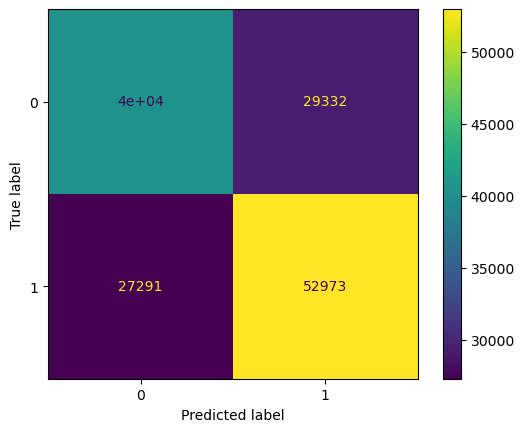

In [81]:
# Calculate the confusion matrix
conf_matrix_rfc = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(conf_matrix_rfc).plot()